In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/home/kiara/information systems/application engineering/Final-Project-5100/orders.xlsx"  
data = pd.read_excel(file_path)

data.head()


/home/kiara/anaconda3/envs/info6105/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Delivery ID,Customer Name,Phone Number,Delivery Address,Store Address,Status,Delivery Fee,Assigned To,Delivery Response,Delivery Notes,Expected Delivery Time,Date Requested
0,1,NaN,NaN,81 Spadina,210 King Street,Accepted,25.0,NaN,NaN,NaN,NaN,2024-01-12 10:15:30.0
1,2,NaN,NaN,123 Yonge Street,500 Queen Street,Declined,30.0,NaN,NaN,NaN,NaN,2024-01-12 10:30:00.0
2,3,NaN,NaN,77 Bloor Street,10 Front Street,Accepted,20.0,NaN,NaN,NaN,NaN,2024-01-12 11:00:00.0
3,4,NaN,NaN,66 Dundas Street,300 King Street,Delivered,15.0,NaN,NaN,NaN,NaN,2024-01-12 11:30:45.0
4,5,NaN,NaN,55 Bay Street,150 Richmond Street,Pending,40.0,NaN,NaN,NaN,NaN,2024-01-12 12:00:00.0


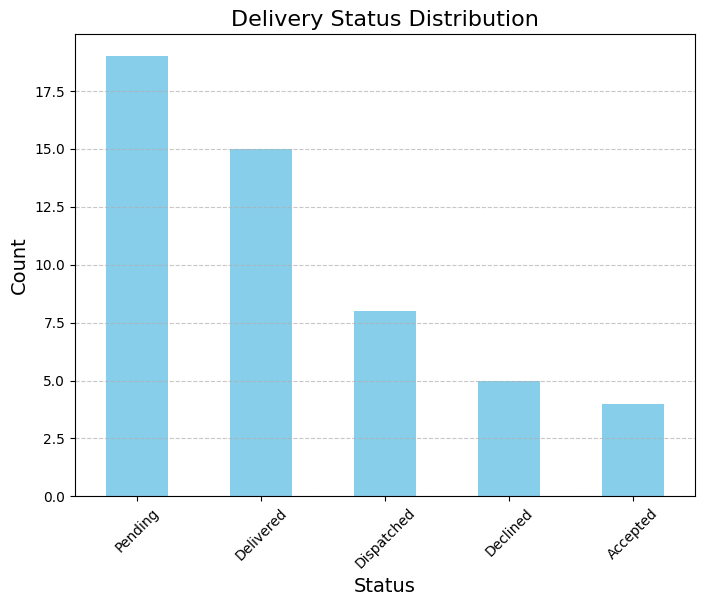

In [8]:
# Distribution of Delivery Statuses
status_counts = data['Status'].value_counts()
status_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Delivery Status Distribution', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

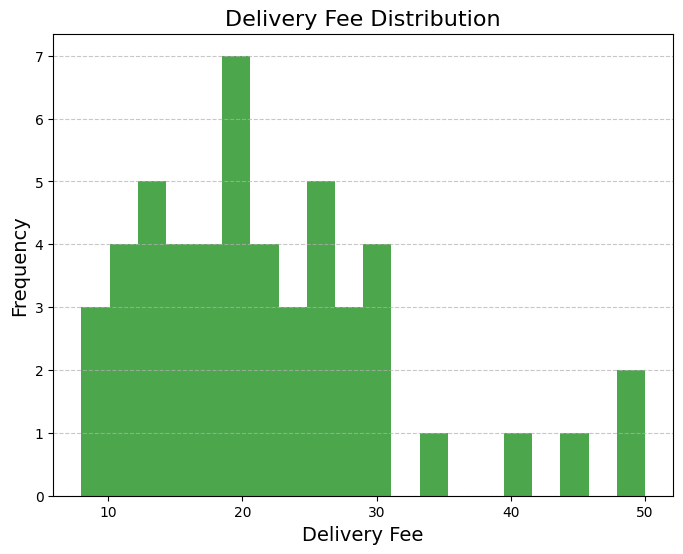

In [9]:
# Delivery Fee Analysis
plt.figure(figsize=(8, 6))
plt.hist(data['Delivery Fee'], bins=20, color='green', alpha=0.7)
plt.title('Delivery Fee Distribution', fontsize=16)
plt.xlabel('Delivery Fee', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

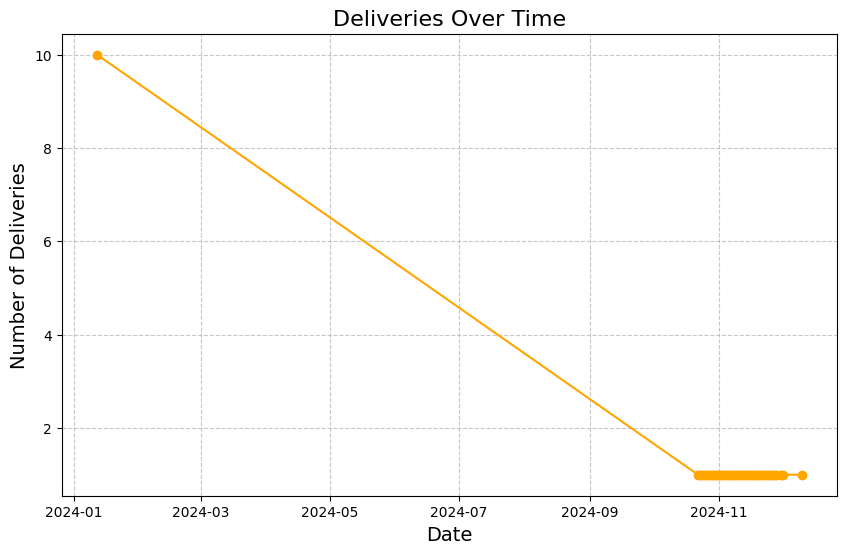

In [10]:
# Delivery Timeline Analysis
data['Date Requested'] = pd.to_datetime(data['Date Requested']) 
timeline_counts = data['Date Requested'].dt.date.value_counts().sort_index()
timeline_counts.plot(kind='line', marker='o', color='orange', figsize=(10, 6))
plt.title('Deliveries Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Deliveries', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_1331083/2538748778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected_orders['Delivery Response'] = rejected_orders['Delivery Response'].fillna('No Reason Provided')


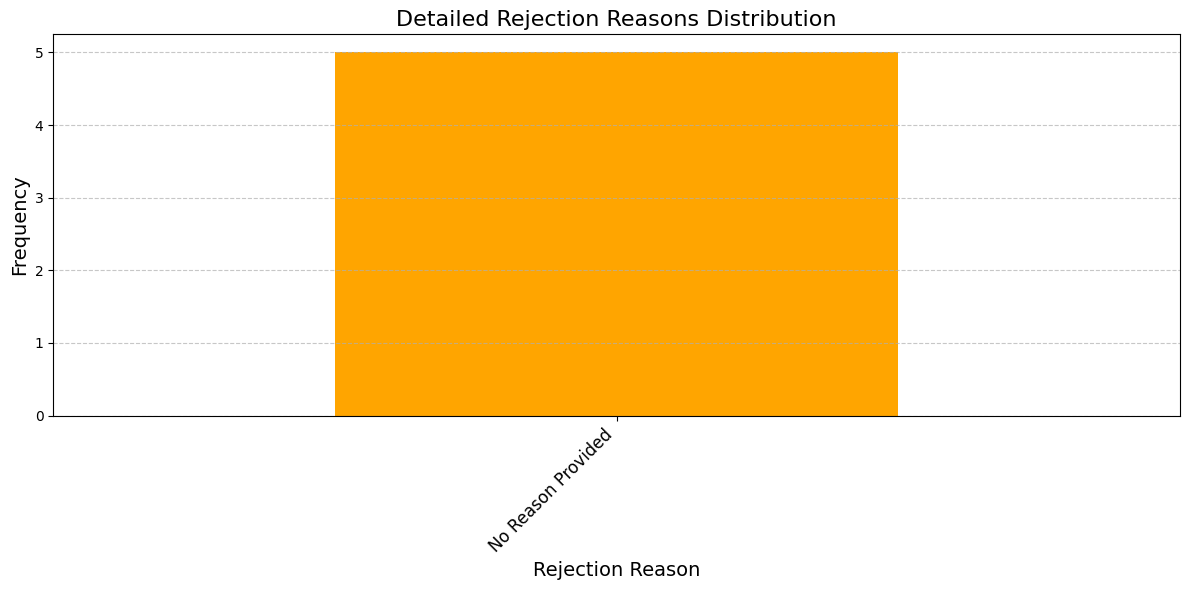

In [20]:
# Analysis of Declined Orders
rejected_orders = data[data['Status'] == 'Declined']
rejected_orders['Delivery Response'] = rejected_orders['Delivery Response'].fillna('No Reason Provided')

if not rejected_orders.empty:
    # Get all unique reasons with their counts
    rejection_reasons = rejected_orders['Delivery Response'].value_counts()

    # Plot the rejection reasons
    rejection_reasons.plot(kind='bar', color='orange', figsize=(12, 6))
    plt.title('Detailed Rejection Reasons Distribution', fontsize=16)
    plt.xlabel('Rejection Reason', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No rejected orders found in the dataset.")